In [7]:
def f(x, y):
    return x**2 + y**2

# Initial condition
x0 = 1
y0 = 1.2
h = 0.05  # Step size
x_target = 1.05

# RK4 method
def runge_kutta_4(x0, y0, h, x_target):
    while x0 < x_target:
        k1 = f(x0, y0)
        k2 = f(x0 + h/2, y0 + k1*h/2)
        k3 = f(x0 + h/2, y0 + k2*h/2)
        k4 = f(x0 + h, y0 + h*k3)

        y0 = y0 + (k1 + 2*k2 + 2*k3 + k4)*h / 6
        x0 = x0 + h

    return y0

# Run it
result = runge_kutta_4(x0, y0, h, x_target)
print(f"🎯 Approximate solution at x = {x_target} is y = {result:.6f}")


🎯 Approximate solution at x = 1.05 is y = 1.332557


🎯 Approximate solution at x = 1.25 is y = 2.191661

+------+---------+---------+---------+---------+---------+----------+
|    x |       y |      k1 |      k2 |      k3 |      k4 |   y_next |
+======+=========+=========+=========+=========+=========+==========+
| 1    | 1.2     | 2.44    | 2.64075 | 2.65343 | 2.87851 |  1.33256 |
+------+---------+---------+---------+---------+---------+----------+
| 1.05 | 1.33256 | 2.87821 | 3.12828 | 3.14588 | 3.42966 |  1.48969 |
+------+---------+---------+---------+---------+---------+----------+
| 1.1  | 1.48969 | 3.42918 | 3.74758 | 3.77272 | 4.13929 |  1.6781  |
+------+---------+---------+---------+---------+---------+----------+
| 1.15 | 1.6781  | 4.13852 | 4.55459 | 4.59177 | 5.07928 |  1.90735 |
+------+---------+---------+---------+---------+---------+----------+
| 1.2  | 1.90735 | 5.078   | 5.63902 | 5.69628 | 6.36811 |  2.19166 |
+------+---------+---------+---------+---------+---------+----------+


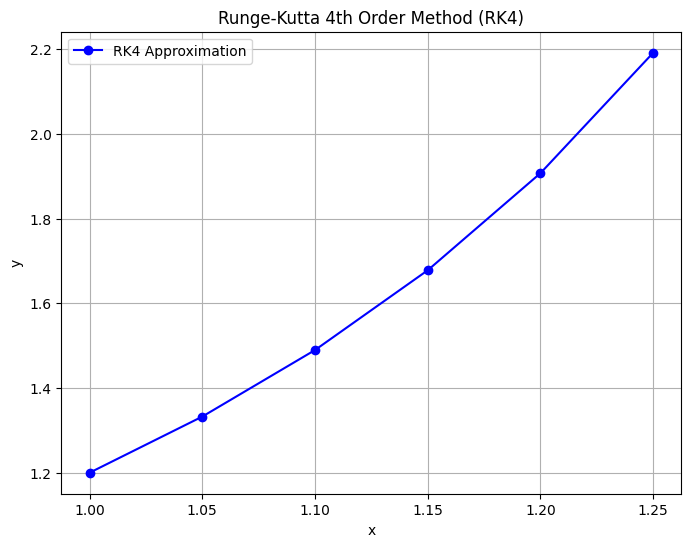

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Function dy/dx = f(x, y)
def f(x, y):
    return x**2 + y**2

# Initial values
x0 = 1
y0 = 1.2
h = 0.05
x_target = 1.25

# Lists for storing values
x_vals = [x0]
y_vals = [y0]
table = []

# RK4 method loop
while x0 < x_target:
    k1 = f(x0, y0)
    k2 = f(x0 + h/2, y0 + h*k1/2)
    k3 = f(x0 + h/2, y0 + h*k2/2)
    k4 = f(x0 + h, y0 + h*k3)

    y_next = y0 + (k1 + 2*k2 + 2*k3 + k4) * h / 6
    x_next = x0 + h

    table.append([f"{x0:.3f}", f"{y0:.6f}", f"{k1:.6f}", f"{k2:.6f}", f"{k3:.6f}", f"{k4:.6f}", f"{y_next:.6f}"])

    x_vals.append(x_next)
    y_vals.append(y_next)

    x0, y0 = x_next, y_next

# 🎯 Final Result
print(f"🎯 Approximate solution at x = {x_target} is y = {y_next:.6f}\n")

# 📊 Show Table
headers = ["x", "y", "k1", "k2", "k3", "k4", "y_next"]
print(tabulate(table, headers=headers, tablefmt="grid"))

# 📈 Plotting
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', label="RK4 Approximation")
plt.title("Runge-Kutta 4th Order Method (RK4)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
